<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Dataset-utilizado" data-toc-modified-id="Dataset-utilizado-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Dataset utilizado</a></span><ul class="toc-item"><li><span><a href="#Número-de-amostras-e-colunas" data-toc-modified-id="Número-de-amostras-e-colunas-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Número de amostras e colunas</a></span></li><li><span><a href="#Vitórias-por-time" data-toc-modified-id="Vitórias-por-time-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Vitórias por time</a></span></li></ul></li><li><span><a href="#Separar-dados-para-treinamento" data-toc-modified-id="Separar-dados-para-treinamento-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Separar dados para treinamento</a></span></li><li><span><a href="#Treinar-modelo-de-regressão-logística" data-toc-modified-id="Treinar-modelo-de-regressão-logística-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Treinar modelo de regressão logística</a></span></li><li><span><a href="#Mostrando-e-salvando-Resultados" data-toc-modified-id="Mostrando-e-salvando-Resultados-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Mostrando e salvando Resultados</a></span></li><li><span><a href="#Conclusão-e-próximos-passos" data-toc-modified-id="Conclusão-e-próximos-passos-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Conclusão e próximos passos</a></span></li></ul></div>

---
# Experimento 0: Modelo Baseline

**Objetivo do experimento:** Determinar um modelo base para comparar com os resultados de experimentos futuros. Será utilizado um algoritmo de regressão logística.

**Formato do experimento:** Serão utilizadas todas as variáveis do arquivo ``2021-08-03_working_data.csv``. 
1. Os dados serão divididos em 5 conjuntos, onde será aplicada uma validação cruzada;
2. O passo 1 será repetido 3 vezes com os dados sendo separados aleatoriamente em cada uma das vezes;
3. Será calculada a acurácia média destes 15 conjuntos de teste;

**Métrica de avaliação:** Acurácia média dos dados de testes nos 15 conjuntos de dados: 3 validações cruzadas, onde cada validação possui 1 conjunto de teste.

---
**Importing libraries**

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

**Loading data**

In [2]:
data_path = '../data/working_data/'
file = '2021-08-03_working_data.csv'
df_original = pd.read_csv(data_path+file)

---
## Dataset utilizado

Por se tratar do modelo de baseline os dados referentes à lobby_type e game_mode não foram removidos. 


### Número de amostras e colunas

In [3]:
print('Número total de amostras:', df_original.shape)
print('Colunas:\n', df_original.columns)
df_original.head()

Número total de amostras: (113400, 15)
Colunas:
 Index(['radiant_win', 'avg_mmr', 'duration', 'lobby_type', 'game_mode',
       'Radiant 1', 'Radiant 2', 'Radiant 3', 'Radiant 4', 'Radiant 5',
       'Dire 1', 'Dire 2', 'Dire 3', 'Dire 4', 'Dire 5'],
      dtype='object')


,radiant_win,avg_mmr,duration,lobby_type,game_mode,Radiant 1,Radiant 2,Radiant 3,Radiant 4,Radiant 5,Dire 1,Dire 2,Dire 3,Dire 4,Dire 5
0,0,4104,2147,7,22,94,67,112,5,16.0,14,90,52,1,121
1,0,6421,1526,7,22,72,9,58,89,16.0,79,25,12,119,120
2,1,5062,1323,7,22,111,48,53,101,26.0,31,41,10,88,62
3,1,3943,1956,7,22,41,83,74,123,114.0,109,22,98,107,30
4,0,3515,2087,7,3,59,112,4,41,31.0,88,11,96,110,10


**Informações gerais**

In [4]:
df_original.describe().T

,count,mean,std,min,25%,50%,75%,max
radiant_win,113400.0,0.525688,0.499342,0.0,0.0,1.0,1.0,1.0
avg_mmr,113400.0,4040.530159,474.736865,3500.0,3693.0,3932.0,4247.0,8494.0
duration,113400.0,2329.575855,580.650954,362.0,1956.0,2273.0,2650.0,7408.0
lobby_type,113400.0,5.457910,2.903710,0.0,7.0,7.0,7.0,9.0
game_mode,113400.0,19.296825,6.618990,1.0,22.0,22.0,22.0,22.0
Radiant 1,113400.0,57.951605,37.693319,1.0,25.0,52.0,90.0,135.0
Radiant 2,113400.0,57.736561,37.661342,1.0,25.0,52.0,90.0,135.0
Radiant 3,113400.0,57.960388,37.783283,1.0,25.0,52.0,90.0,135.0
Radiant 4,113400.0,57.856984,37.768054,1.0,25.0,52.0,90.0,135.0
Radiant 5,113399.0,57.733410,37.694819,1.0,25.0,52.0,90.0,135.0


### Vitórias por time

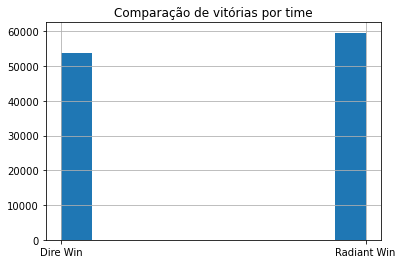

Percentual:


1    0.525692
0    0.474308
Name: radiant_win, dtype: float64

In [5]:
df_original['radiant_win'].hist()
plt.title('Comparação de vitórias por time')
plt.xticks([0,1],['Dire Win', 'Radiant Win'])
plt.show()

df_original.dropna(inplace=True)
print('Percentual:')
df_original['radiant_win'].value_counts(normalize=True)

---
## Separar dados para treinamento

In [6]:
colum_names = df_original.columns

y_column = ['radiant_win']
X_columns = set(colum_names) - set(y_column)

X = df_original[X_columns]
y = df_original[y_column[0]].values


---
## Treinar modelo de regressão logística

In [7]:
model = LogisticRegression()
n_folds = 5
repeated_cv = 3




cv = RepeatedStratifiedKFold(n_splits=n_folds, n_repeats=repeated_cv, random_state=1)
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

scores

array([0.5366843 , 0.53346561, 0.53289242, 0.53201058, 0.5288593 ,
       0.53571429, 0.53522928, 0.53104056, 0.53377425, 0.53137264,
       0.53694885, 0.53399471, 0.53390653, 0.53156966, 0.52938842])

---
## Mostrando e salvando Resultados

In [8]:
output_savepath = '../3.Experiments_output/00.Exp_Baseline_Model/'
print('Acurácia Média Geral: %.5f' % np.mean(scores))

Acurácia Média Geral: 0.53312


In [11]:
aux_mtx = np.reshape(scores, (repeated_cv, n_folds))

col_fold_names = ['Partition-1', 'Partition-2', 'Partition-3', 'Partition-4', 'Partition-5']
index_fold_names = ['1o Cross Validation', '2o Cross Validation', '3o Cross Validation']
result_df_plt = pd.DataFrame(aux_mtx, columns=col_fold_names, index=index_fold_names)

display(result_df_plt)

# Saving
result_df_plt.to_csv(output_savepath+'logistic_regression_result.csv')

,Partition-1,Partition-2,Partition-3,Partition-4,Partition-5
1o Cross Validation,0.536684,0.533466,0.532892,0.532011,0.528859
2o Cross Validation,0.535714,0.535229,0.531041,0.533774,0.531373
3o Cross Validation,0.536949,0.533995,0.533907,0.531570,0.529388


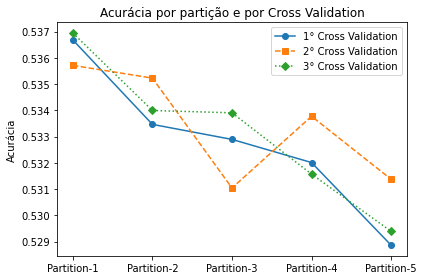

In [12]:
plt.plot(result_df_plt.iloc[0,:], ls='-', marker='o',label='1° Cross Validation')
plt.plot(result_df_plt.iloc[1,:], ls='--', marker='s', label='2° Cross Validation')
plt.plot(result_df_plt.iloc[2,:], ls=':', marker='D', label='3° Cross Validation')
plt.ylabel('Acurácia')
plt.legend(loc='best')
plt.xticks([0,1,2,3,4],col_fold_names)
plt.title('Acurácia por partição e por Cross Validation')
plt.tight_layout()

plt.savefig(output_savepath+'reg_logistica_acuracia_por_CV')



---
## Conclusão e próximos passos

O modelo de regressão logística obteve uma acurácia geral de 53.31% que pode ser considerado um resultado muito próximo de uma decisão aleatória. Os próximos passos devem consistir de:

1. Testar novos modelos com este mesmo conjunto de dados;
2. Testar os diferentes modelos focando em um mesmo tipo de lobby_type e game_mode;